<a href="https://colab.research.google.com/github/twyeh/university-physics/blob/main/Solenoid_Magnetic_Fields.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install magpylib if needed
!pip install magpylib

import magpylib as magpy
import numpy as np
import matplotlib.pyplot as plt

# Solenoid parameters
I = 5            # current in A
radius = 0.1     # solenoid radius in m
length = 0.5     # solenoid length in m
N = 50           # number of windings

# Build solenoid (collection of loops)
sol = magpy.Collection()
zs = np.linspace(-length/2, length/2, N)
for z in zs:
    loop = magpy.current.Circle(
        current=I,
        diameter=2*radius,
        position=(0, 0, z)
    )
    sol.add(loop)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.8/188.8 kB 3.4 MB/s eta 0:00:00


In [2]:
# Create observer grid in x–z plane at y=0
nx, nz = 50, 50
x = np.linspace(-0.2, 0.2, nx)
z = np.linspace(-0.3, 0.3, nz)
X, Z = np.meshgrid(x, z)
grid = np.stack([X, np.zeros_like(X), Z], axis=-1)

# Compute B-field on grid
B = sol.getB(grid)
Bx = B[:, :, 0]
Bz = B[:, :, 2]
Bamp = np.sqrt(Bx**2 + Bz**2)


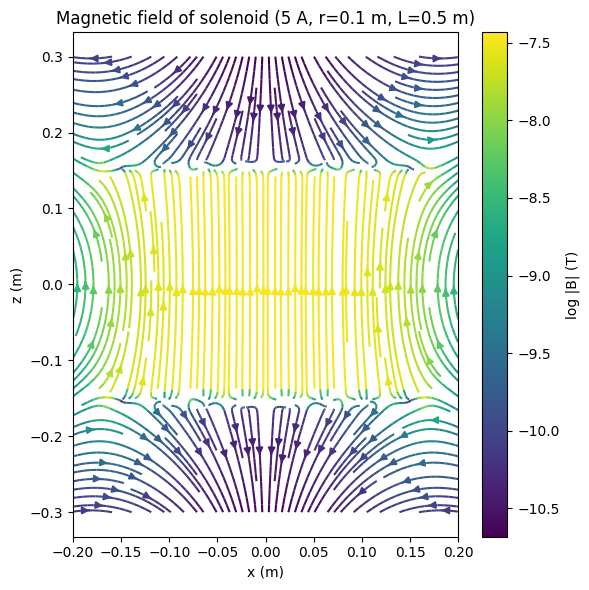

In [3]:
# Plot streamlines of B-field
fig, ax = plt.subplots(figsize=(6,6))
strm = ax.streamplot(
    x, z,
    Bx.T, Bz.T,
    density=2,
    color=np.log(Bamp).T,
    cmap='viridis'
)
ax.set_xlabel('x (m)')
ax.set_ylabel('z (m)')
ax.set_title('Magnetic field of solenoid (5 A, r=0.1 m, L=0.5 m)')
plt.colorbar(strm.lines, ax=ax, label='log |B| (T)')
plt.tight_layout()
plt.show()


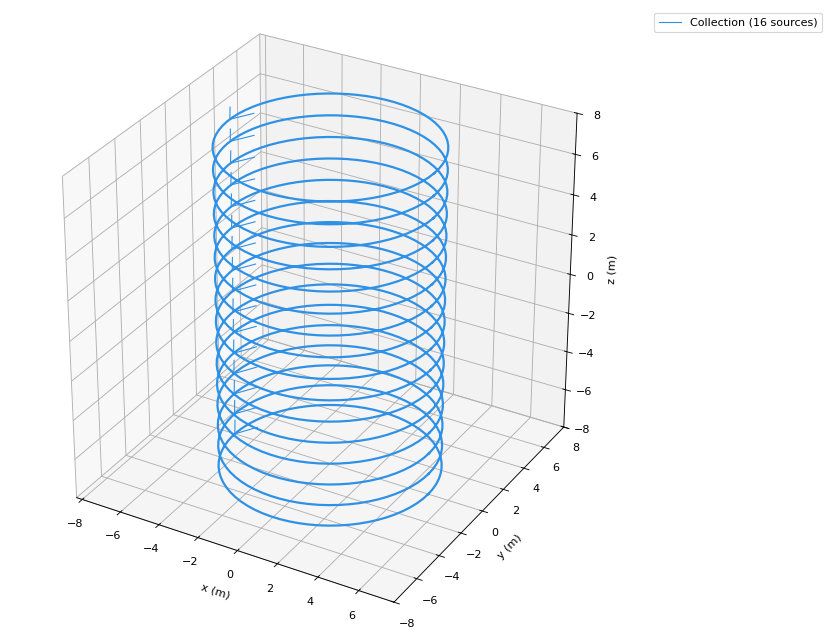

In [4]:
import numpy as np
import magpylib as magpy

coil1 = magpy.Collection()
for z in np.linspace(-8, 8, 16):
    winding = magpy.current.Circle(
        current=100,
        diameter=10,
        position=(0,0,z),
    )
    coil1.add(winding)

coil1.show()

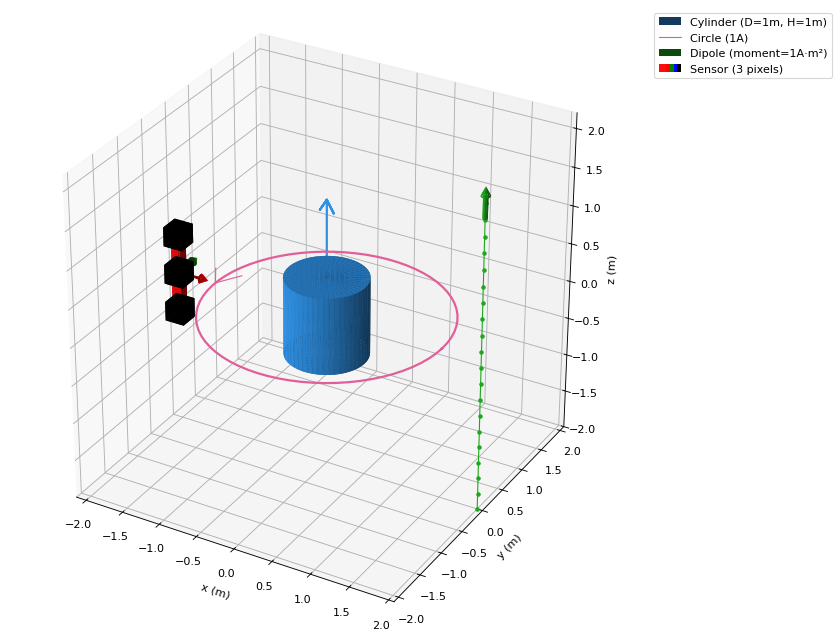

In [5]:
import magpylib as magpy
import numpy as np

magnet = magpy.magnet.Cylinder(
    polarization=(0, 0, 1),
    dimension=(1, 1),
)
current = magpy.current.Circle(
    current=1,
    diameter=3,
)
dipole = magpy.misc.Dipole(
    moment=(0, 0, 1),
    position=np.linspace((2, 0, -2), (2, 0, 2), 20),
)
sensor = magpy.Sensor(
    pixel=[(0, 0, z) for z in (-0.5, 0, 0.5)],
    position=(-2, 0, 0),
)
magpy.show(magnet, current, dipole, sensor)

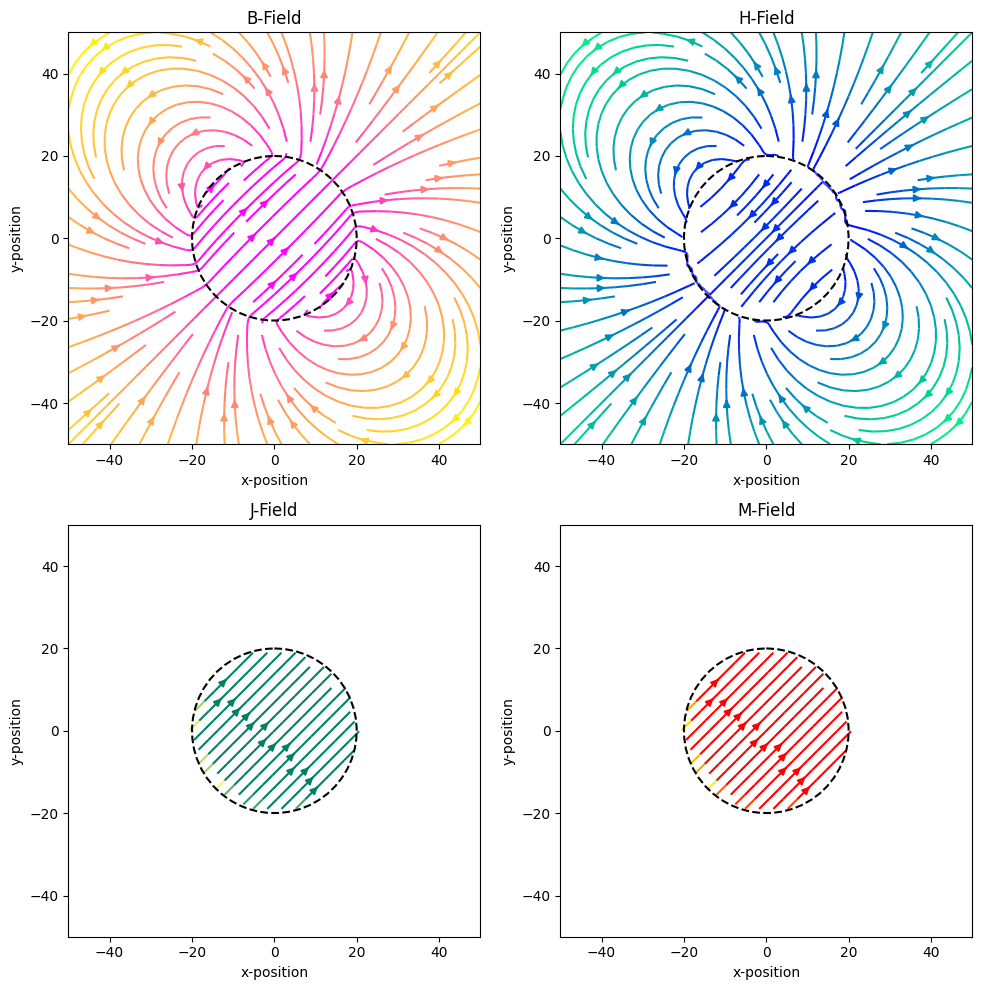

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import norm
import magpylib as magpy

fig, [[ax1,ax2], [ax3,ax4]] = plt.subplots(2, 2, figsize=(10, 10))

# Create an observer grid in the xy-symmetry plane
grid = np.mgrid[-50:50:100j, -50:50:100j, 0:0:1j].T[0]
X, Y, _ = np.moveaxis(grid, 2, 0)

# Compute BHJM-fields of a cylinder magnet on the grid
cyl = magpy.magnet.Cylinder(polarization=(0.5, 0.5, 0), dimension=(40, 20))

B = cyl.getB(grid)
Bx, By, _ = np.moveaxis(B, 2, 0)

H = cyl.getH(grid)
Hx, Hy, _ = np.moveaxis(H, 2, 0)

J = cyl.getJ(grid)
Jx, Jy, _ = np.moveaxis(J, 2, 0)

M = cyl.getM(grid)
Mx, My, _ = np.moveaxis(M, 2, 0)

# Display field with Pyplot
ax1.streamplot(X, Y, Bx, By, color=np.log(norm(B, axis=2)), cmap="spring_r")
ax2.streamplot(X, Y, Hx, Hy, color=np.log(norm(H, axis=2)), cmap="winter_r")
ax3.streamplot(X, Y, Jx, Jy, color=norm(J, axis=2), cmap="summer_r")
ax4.streamplot(X, Y, Mx, My, color=norm(M, axis=2), cmap="autumn_r")

ax1.set_title("B-Field")
ax2.set_title("H-Field")
ax3.set_title("J-Field")
ax4.set_title("M-Field")

for ax in [ax1,ax2,ax3,ax4]:
    ax.set(
        xlabel="x-position",
        ylabel="y-position",
        aspect=1,
        xlim=(-50,50),
        ylim=(-50,50),
    )
    # Outline magnet boundary
    ts = np.linspace(0, 2 * np.pi, 50)
    ax.plot(20 * np.sin(ts), 20 * np.cos(ts), "k--")

plt.tight_layout()
plt.show()

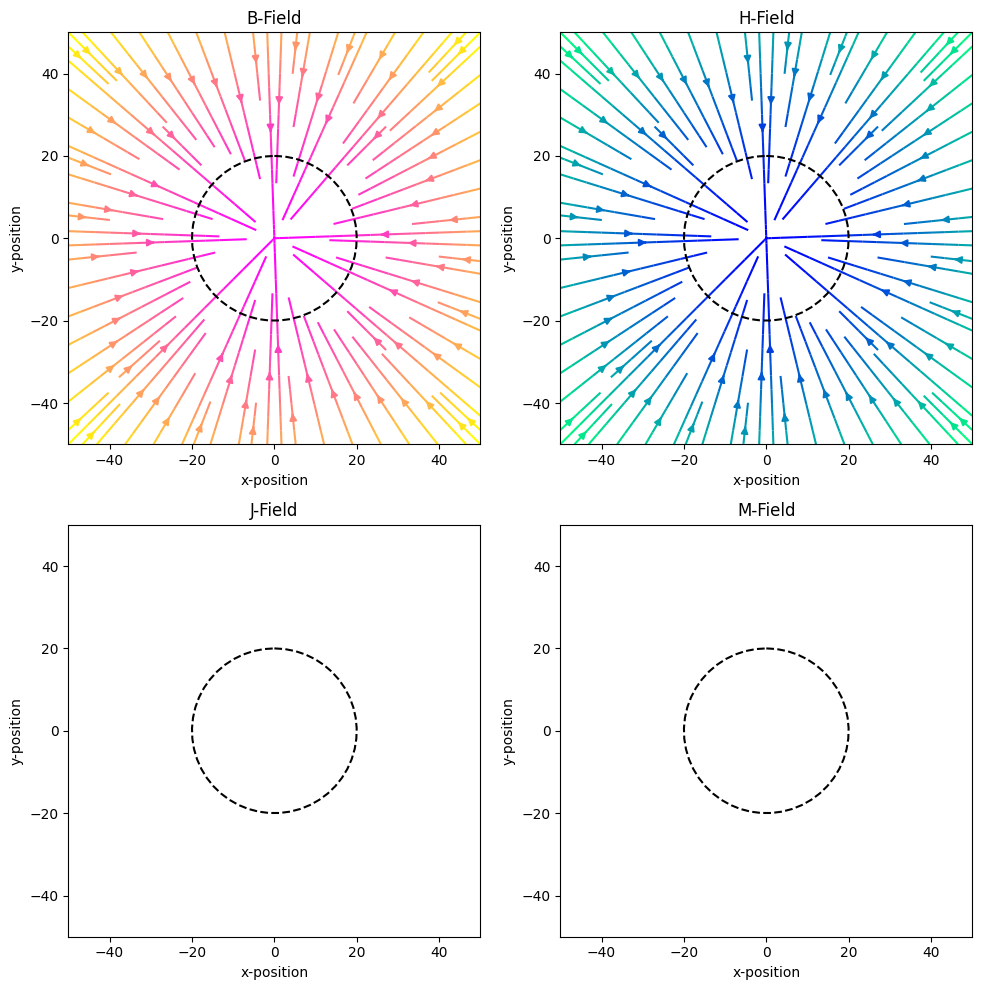

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import norm
import magpylib as magpy

fig, [[ax1,ax2], [ax3,ax4]] = plt.subplots(2, 2, figsize=(10, 10))

# Create an observer grid in the xy-symmetry plane
grid = np.mgrid[-50:50:100j, -50:50:100j, -50:50:100j].T[0]
X, Y, Z = np.moveaxis(grid, 2, 0)

# Compute BHJM-fields of a cylinder magnet on the grid

cyl = magpy.Collection()
for z in np.linspace(-8, 8, 16):
    winding = magpy.current.Circle(
        current=100,
        diameter=10,
        position=(0,0,z),
    )
    cyl.add(winding)

#cyl.show()

B = cyl.getB(grid)
Bx, By, _ = np.moveaxis(B, 2, 0)

H = cyl.getH(grid)
Hx, Hy, _ = np.moveaxis(H, 2, 0)

J = cyl.getJ(grid)
Jx, Jy, _ = np.moveaxis(J, 2, 0)

M = cyl.getM(grid)
Mx, My, _ = np.moveaxis(M, 2, 0)

# Display field with Pyplot
ax1.streamplot(X, Y, Bx, By, color=np.log(norm(B, axis=2)), cmap="spring_r")
ax2.streamplot(X, Y, Hx, Hy, color=np.log(norm(H, axis=2)), cmap="winter_r")
ax3.streamplot(X, Y, Jx, Jy, color=norm(J, axis=2), cmap="summer_r")
ax4.streamplot(X, Y, Mx, My, color=norm(M, axis=2), cmap="autumn_r")

ax1.set_title("B-Field")
ax2.set_title("H-Field")
ax3.set_title("J-Field")
ax4.set_title("M-Field")

for ax in [ax1,ax2,ax3,ax4]:
    ax.set(
        xlabel="x-position",
        ylabel="y-position",
        aspect=1,
        xlim=(-50,50),
        ylim=(-50,50),
    )
    # Outline magnet boundary
    ts = np.linspace(0, 2 * np.pi, 50)
    ax.plot(20 * np.sin(ts), 20 * np.cos(ts), "k--")

plt.tight_layout()
plt.show()

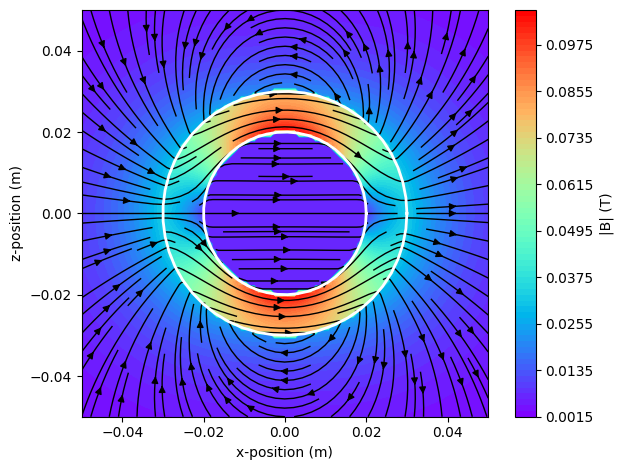

In [12]:
import matplotlib.pyplot as plt
import numpy as np

import magpylib as magpy

# Create a Matplotlib figure
fig, ax = plt.subplots()

# Create an observer grid in the xy-symmetry plane - using pure numpy
grid = np.mgrid[-.05:.05:100j, -.05:.05:100j, 0:0:1j].T[0]
X, Y, _ = np.moveaxis(grid, 2, 0)

# Compute magnetic field on grid - using the functional interface
B = magpy.getB(
    "CylinderSegment",
    observers=grid.reshape(-1, 3),
    dimension=(0.02, 0.03, 0.05, 0, 360),
    polarization=(0.1, 0, 0),
)
B = B.reshape(grid.shape)
Bx, By, _ = np.moveaxis(B, 2, 0)
normB = np.linalg.norm(B, axis=2)

# Combine streamplot with contourf
cp = ax.contourf(X, Y, normB, cmap="rainbow", levels=100)
splt = ax.streamplot(X, Y, Bx, By, color="k", density=1.5, linewidth=1)

# Add colorbar
fig.colorbar(cp, ax=ax, label="|B| (T)")

# Outline magnet boundary
ts = np.linspace(0, 2 * np.pi, 50)
ax.plot(.03*np.cos(ts), .03*np.sin(ts), "w-", lw=2, zorder=2)
ax.plot(.02*np.cos(ts), .02*np.sin(ts), "w-", lw=2, zorder=2)

# Figure styling
ax.set(
    xlabel="x-position (m)",
    ylabel="z-position (m)",
    aspect=1,
)

plt.tight_layout()
plt.show()